___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas. There is another notebook: *Advanced Recommender Systems with Python*. That notebook goes into more detail with the same data set.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Get the Data

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


Now let's get the movie titles:

In [6]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We can merge them together:

In [7]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [9]:
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [10]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [11]:
df.groupby('title')['rating'].count()

title
'Til There Was You (1997)                                     9
1-900 (1994)                                                  5
101 Dalmatians (1996)                                       109
12 Angry Men (1957)                                         125
187 (1997)                                                   41
2 Days in the Valley (1996)                                  93
20,000 Leagues Under the Sea (1954)                          72
2001: A Space Odyssey (1968)                                259
3 Ninjas: High Noon At Mega Mountain (1998)                   5
39 Steps, The (1935)                                         59
8 1/2 (1963)                                                 38
8 Heads in a Duffel Bag (1997)                                4
8 Seconds (1994)                                              4
A Chef in Love (1996)                                         8
Above the Rim (1994)                                          5
Absolute Power (1997)             

In [12]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [13]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Now set the number of ratings column:

In [14]:
ratings['vote numbers'] = df.groupby('title')['rating'].count()

In [15]:
ratings.head()

,rating,vote numbers
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now a few histograms:

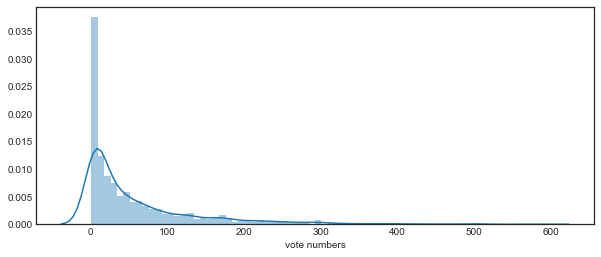

In [16]:
plt.figure(figsize=(10,4))
sns.distplot(ratings['vote numbers'],bins=70)

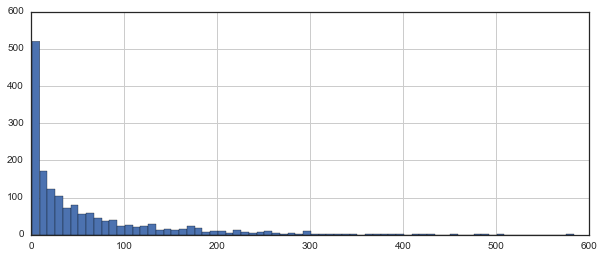

In [146]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

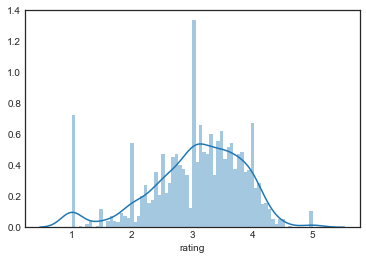

In [17]:
sns.distplot(ratings['rating'],bins=70)

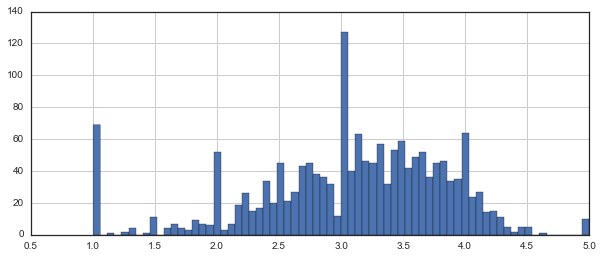

In [147]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

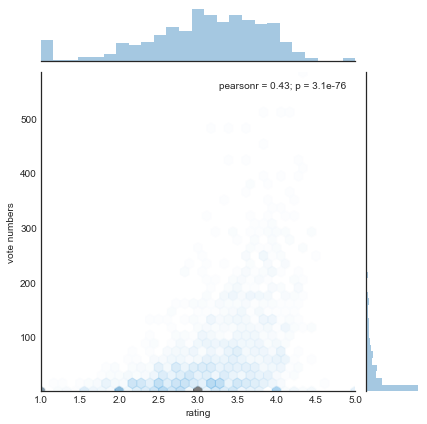

In [18]:
sns.jointplot(x='rating',y='vote numbers', data=ratings, alpha=0.5, kind='hex')

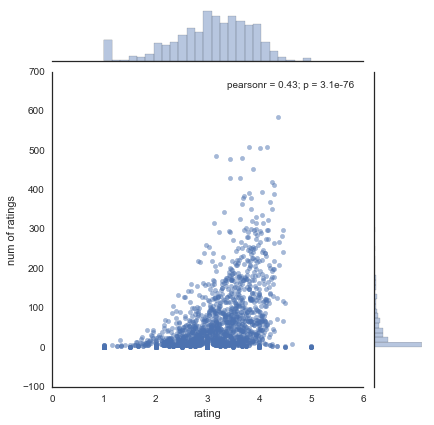

In [148]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [19]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
# list all rating by a user for every movie
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [20]:
ratings.sort_values(by='vote numbers', ascending=False).head(10)

,rating,vote numbers
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [150]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [21]:
ratings.head()

,rating,vote numbers
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now let's grab the user ratings for those two movies:

In [23]:
starwars_ratings = moviemat['Star Wars (1977)']
liarliar_ratings = moviemat['Liar Liar (1997)']
starwars_ratings.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [25]:
similar_starwars = moviemat.corrwith(starwars_ratings)
# find correlation between 2 pandas series by comparing it with the ratings by users for each movies and then just Starwars
similar_starwars

/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
'Til There Was You (1997)                                   0.872872
1-900 (1994)                                               -0.645497
101 Dalmatians (1996)                                       0.211132
12 Angry Men (1957)                                         0.184289
187 (1997)                                                  0.027398
2 Days in the Valley (1996)                                 0.066654
20,000 Leagues Under the Sea (1954)                         0.289768
2001: A Space Odyssey (1968)                                0.230884
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                        0.106453
8 1/2 (1963)                                               -0.142977
8 Heads in a Duffel Bag (1997)                             -0.577350
8 Seconds (1994)                                           -0.755929
A Chef in Love (1996)                                       0.868599
Above the Rim (1994)        

Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [39]:
starwarsDF = pd.DataFrame(similar_starwars, columns = ['Correlation'])
starwarsDF.dropna(inplace=True)
#As evident from above, a lot of NA
starwarsDF.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [40]:
starwarsDF.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [41]:
starwarsDF = starwarsDF.join(ratings['vote numbers']) #use join because same index, so shouldn't use merge
starwarsDF.head()

,Correlation,vote numbers
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values and notice how the titles make a lot more sense:

In [42]:
starwarsDF[starwarsDF['vote numbers']>100].sort_values('Correlation', ascending=False).head(10)
#only find those that have more than 100 votes

,Correlation,vote numbers
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


Now the same for the comedy Liar Liar:

In [50]:
def findMovie(movie):
    movie_ratings = moviemat[movie]
    movieDF = pd.DataFrame(moviemat.corrwith(movie_ratings),columns=['Correlation'])
    movieDF.dropna(inplace=True)
    movieDF = movieDF.join(ratings['vote numbers'])
    print(movieDF[movieDF['vote numbers']>100].sort_values('Correlation', ascending=False).head(10))

In [51]:
findMovie('Liar Liar (1997)')

/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


                                           Correlation  vote numbers
title                                                               
Liar Liar (1997)                              1.000000           485
Batman Forever (1995)                         0.516968           114
Mask, The (1994)                              0.484650           129
Down Periscope (1996)                         0.472681           101
Con Air (1997)                                0.469828           137
Pretty Woman (1990)                           0.469790           164
101 Dalmatians (1996)                         0.469765           109
Michael (1996)                                0.442022           119
Waterworld (1995)                             0.438405           102
Indiana Jones and the Last Crusade (1989)     0.414427           331


In [ ]:
moviemat['Breakfast at Tiffany\'s (1961)']

In [53]:
findMovie('Breakfast at Tiffany\'s (1961)')

/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


                                  Correlation  vote numbers
title                                                      
Devil's Advocate, The (1997)         0.710472           188
Wag the Dog (1997)                   0.685994           137
Waterworld (1995)                    0.526624           102
Rosewood (1997)                      0.520938           114
On Golden Pond (1981)                0.508060           106
Piano, The (1993)                    0.489691           168
In the Name of the Father (1993)     0.477957           102
Room with a View, A (1986)           0.450139           134
Good Will Hunting (1997)             0.449006           198
Fly Away Home (1996)                 0.448987           180


# Great Job!